# Appliances Forecating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

c:\Users\Morinyo Baddestman\Documents\Time_Series_Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#read CSV file
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX032NEN/images/data/energydata_complete.csv')
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

we are analyzing the Appliances which are used in January 2016 to May 2016, and we will be predicting appliances for next five months which are June to Sept 2016.


workflow
1. preprocessing and EDA
datatype conversion
data cleaning: missing values, irregular dates() # note: prophet is able to handle missing values

EDA
visualize the data using a line plot to see the trends, seasonalities 
decompose the data into trends, seasonalities and holidays to understand it more intrecately
X check for stationarity using ADF
#The goal is to identify the trend, seasonalities and holiday effects

modeling
create a base model, fit and predict
asses the model perfomance (using cross validation) and set it as the reffrence value for future tuning
create a future dataframe and asses the model components
visualize the predictions and actual values

#tune model
tune the models hyperparameters for better perfomance
asses perfomance & visualize the actual vs predicted values

interpretation and communication
#interpret the components
trend - increasing or decreasing
seasonalities - what are the dominant cycles; yearly, weekly
asses holiday effect 

#communicate uncertainity
highlight prediction intervals to communicate forecast uncertainities

#communicate business insights
translate the forecast into actionable reccomendations




In [3]:
# lowercase columns for easier indexing
df.columns = [col.lower() for col in df.columns]

# shape and data features info
print('df shape\n',df.shape)
print(df.info())

df shape
 (19735, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   t1           19735 non-null  float64
 4   rh_1         19735 non-null  float64
 5   t2           19735 non-null  float64
 6   rh_2         19735 non-null  float64
 7   t3           19735 non-null  float64
 8   rh_3         19735 non-null  float64
 9   t4           19735 non-null  float64
 10  rh_4         19735 non-null  float64
 11  t5           19735 non-null  float64
 12  rh_5         19735 non-null  float64
 13  t6           19735 non-null  float64
 14  rh_6         19735 non-null  float64
 15  t7           19735 non-null  float64
 16  rh_7         19735 non-null  float64
 17  t8           19735 non-null  float64
 18  rh_8         19735 non-n

In [4]:
# convert date column from object to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst= True)

# print the number of unque dates
df['date'].nunique()

19735

In [5]:
# select the 2 columns to be used to forecast
data = df[['date', 'appliances']]

# visualize the data using line plot
fig = px.line(data, x='date', y='appliances', title= 'date vs appliances')
fig.show()

## Model Building 

create a base model, fit and predict
asses the model perfomance (using cross validation) and set it as the reffrence value for future tuning
create a future dataframe and asses the model components
visualize the predictions and actual values

### Base model

In [6]:
# rename colums 
data.columns = ['ds', 'y']

#initialize and fit model class
model = Prophet()
model.fit(data)

# create future dates
future_dates = model.make_future_dataframe(periods=150,
                                           freq='d',
                                           include_history=True
                                           )


# predict 
preds = model.predict(future_dates)
preds.head()

13:59:43 - cmdstanpy - INFO - Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing


ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-01-11 17:00:00  119.092680   66.430304  299.594593   119.092680   
1 2016-01-11 17:10:00  119.077492   50.247602  297.615493   119.077492   
2 2016-01-11 17:20:00  119.062304   68.454089  297.902729   119.062304   
3 2016-01-11 17:30:00  119.047116   61.988959  308.390033   119.047116   
4 2016-01-11 17:40:00  119.031929   66.822222  311.096188   119.031929   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   119.092680       58.292430             58.292430             58.292430   
1   119.077492       62.838029             62.838029             62.838029   
2   119.062304       67.153923             67.153923             67.153923   
3   119.047116       71.148082             71.148082             71.148082   
4   119.031929       74.733002             74.733002             74.733002   

       daily  daily_lower  daily_upper     weekly  weekly_lower  weekly_upper  \
0  48.232224    48.232224    48.232224  10.060205     10.060205     10.060205   
1  52.855801    52.855801    52.855801   9.982228      9.982228      9.982228   
2  57.252140    57.252140    57.252140   9.901783      9.901783      9.901783   
3  61.329199    61.329199    61.329199   9.818884      9.818884      9.818884   
4  64.999456    64.999456    64.999456   9.733546      9.733546      9.733546   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  177.385110  
1                         0.0  181.915521  
2                         0.0  186.216227  
3                         0.0  190.195199  
4                         0.0  193.764931

In [7]:
# asses the model perfomance 
y_pred = preds['yhat'][:19735].values

y_true = data['y'].values

mae = mean_absolute_error(y_pred, y_true)
print('mae:', mae)

mae: 52.74595333479718


{'additive': ['weekly', 'daily', 'additive_terms', 'extra_regressors_additive', 'holidays'], 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}


C:\Users\Morinyo Baddestman\AppData\Local\Temp\ipykernel_6224\357539012.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



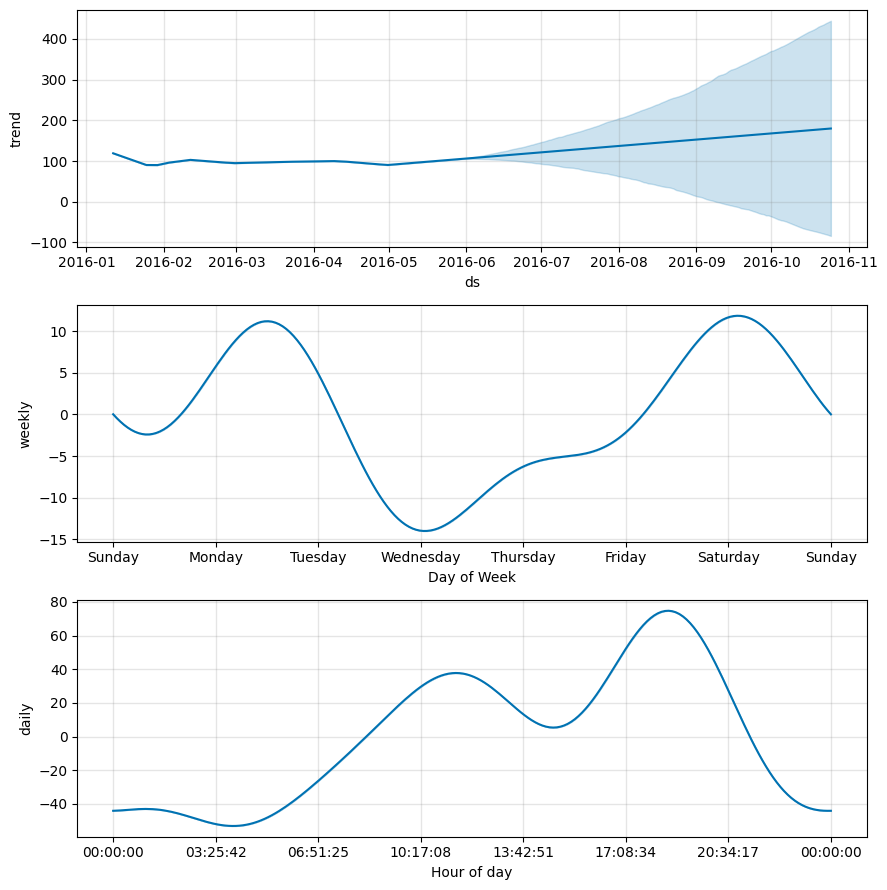

In [8]:
# print the model components
print(model.component_modes)

#plot the model  decomposed components
fig1 = model.plot_components(preds)
fig1.show()

In [9]:
# plot the predicted values plus the optimazations
trace_open = go.Scatter(x=preds['ds'],
                        y=preds['yhat'],
                        mode= 'lines',
                        name="forecast"
                        )    
trace_high = go.Scatter(x=preds['ds'],
                        y=preds['yhat_upper'],
                        mode='lines',
                        fill="tonexty",
                        line = {"color": "#47b0fc"},
                        name= "higher uncertainity level"
                        )
trace_low = go.Scatter(x=preds['ds'],
                       y=preds['yhat_lower'],
                       mode='lines',
                       fill="tonexty",
                       line = {"color": "#57b8ff"},
                       name="lower uncertainity level"
                       )
trace_close = go.Scatter(x=data['ds'],
                         y=data['y'],
                         name="actual_values"
                         )

# make a list of all 3 scatle objects
data1 = [trace_open, trace_high, trace_low, trace_close]

# create a layout object
layout = go.Layout(title='Appliances Forecasting')

fig2 =go.Figure(data=data1)
fig2.show()

In [10]:
# plot the predicted vs actual values 

fig = go.Figure([go.Scatter(x=data['ds'], y=data['y'],mode='lines',
                    name='Actual')])


fig.add_trace(go.Scatter(x=preds['ds'], y=preds['yhat'],
                   mode='lines+markers',
                    name='predicted'))

fig.show()


 Check crossvalidation part later

## Tune the base model

In [ ]:
model1 = Prophet(n_changepoints=30).add_seasonality(name='weekly',period=7, fourier_order=10)
model1.fit(data)


# create a future dataframe
future_dates1= model1.make_future_dataframe(periods=150,
                                            freq= 'd',
                                            include_history=True
                                            )

# predict future dates
preds1 = model1.predict(future_dates1)

# asses the model perfomanace
y_preds1 = preds1['yhat'][:19735].values
y_true1 = data['y'].values

from sklearn.metrics import root_mean_squared_error
print('mae:\n', mean_absolute_error(y_preds1, y_true1)) 
print('rmse:\n', root_mean_squared_error(y_preds1, y_true1)) #to penalize large errors more

15:10:54 - cmdstanpy - INFO - Chain [1] start processing
15:11:31 - cmdstanpy - INFO - Chain [1] done processing


mae:
 51.9920356065763
rmse:
 93.20181432638756


In [ ]:
# use prophets inbuilt cross-validation
from prophet.diagnostics import cross_validation, performance_metrics

model_cv= cross_validation(model=model1,
                           initial=365,
                           period=180,
                           horizon=150
                           )

df_cv = performance_metrics(model_cv)
df_cv


In [30]:
model1.changepoints

526     2016-01-15 08:40:00
1052    2016-01-19 00:20:00
1579    2016-01-22 16:10:00
2105    2016-01-26 07:50:00
2631    2016-01-29 23:30:00
3157    2016-02-02 15:10:00
3684    2016-02-06 07:00:00
4210    2016-02-09 22:40:00
4736    2016-02-13 14:20:00
5262    2016-02-17 06:00:00
5789    2016-02-20 21:50:00
6315    2016-02-24 13:30:00
6841    2016-02-28 05:10:00
7367    2016-03-02 20:50:00
7894    2016-03-06 12:40:00
8420    2016-03-10 04:20:00
8946    2016-03-13 20:00:00
9472    2016-03-17 11:40:00
9998    2016-03-21 03:20:00
10525   2016-03-24 19:10:00
11051   2016-03-28 10:50:00
11577   2016-04-01 02:30:00
12103   2016-04-04 18:10:00
12630   2016-04-08 10:00:00
13156   2016-04-12 01:40:00
13682   2016-04-15 17:20:00
14208   2016-04-19 09:00:00
14735   2016-04-23 00:50:00
15261   2016-04-26 16:30:00
15787   2016-04-30 08:10:00
Name: ds, dtype: datetime64[ns]

In [31]:
# plot the predicted vs the actual values
fig3= go.Figure([go.Scatter(x=data['ds'],
                            y=data['y'],
                            mode='lines',
                            name='Actual values'
                            )])

fig3.add_trace(go.Scatter(x=preds1['ds'],
                          y=preds1['yhat'],
                          mode='lines+markers',
                          name= 'Forecast values'
                          ))

fig3.show()

## interpretation and communication

### Interpreting the time series components
Trend: From the decomposed model components, the trend of the time series is stagnant without a significant rise of fall 

Seasonalities: the time series shows significant cycles in weekly and daily periods with weekly seasonalities showing significant impact 

#communicate uncertainity
highlight prediction intervals to communicate forecast uncertainities

#communicate business insights
translate the forecast into actionable reccomendations